<a href="https://colab.research.google.com/github/mzdwedar/Arabic-Handwritten-Digits-Dataset/blob/main/From_ONNX_to_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
! pip install tensorflow-addons

In [ ]:
!pip install numpy protobuf==3.16.0
!pip install onnx

In [13]:
! pip install onnx_tf

     |████████████████████████████████| 222 kB 7.5 MB/s 


In [16]:
import onnx
import warnings
from onnx_tf.backend import prepare

In [27]:
warnings.filterwarnings('ignore')
model = onnx.load('AHDD_resnet18.onnx') 
tf_rep = prepare(model) # contains: graph, inputs, outputs, and tensor_dict

## Inference

In [40]:
from PIL import Image
import numpy as np


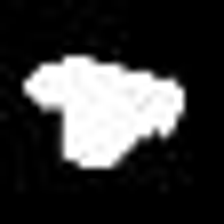

In [53]:
Image.open('digit.jpeg').resize((224, 224)) #contain '0' digit

In [41]:
img = Image.open('digit.jpeg')

In [48]:
image = np.expand_dims(np.array(img, dtype=np.float32), axis=(0,1))

In [38]:
img = np.zeros((1,1,28,28), dtype=np.float32)

In [50]:
preds = tf_rep.run(image)._0

In [52]:
preds.argmax()

0

In [54]:
type(tf_rep)

onnx_tf.backend_rep.TensorflowRep